In [214]:
# from google.colab import drive
# drive.mount('/content/drive/')

### Importation module

In [215]:
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import calendar
import matplotlib.pyplot as plt


### Connection with Colab / VSC

In [216]:
# colab
# quotes = pd.read_csv("/content/drive/MyDrive/Opply/Opply/d5d9348e5c87368cc1b74e6d4dde9794/Quotes.csv")
# request = pd.read_csv('/content/drive/MyDrive/Opply/Opply/d5d9348e5c87368cc1b74e6d4dde9794/Requests.csv')

# vsc

quotes = pd.read_csv("Quotes.csv")
requests = pd.read_csv("Requests.csv")

# 1 - Exploration

In [217]:
print(requests.shape)
print(quotes.shape)

(389, 4)
(492, 6)


In [218]:
requests.head()

,Request UUID,Current Unit Price,Target Unit Price,Supply Priority
0,820412eb-8d4d-4d6c-a5e3-cfc977cd6d48,£3.50,£3.00,Price
1,08f1a913-1318-4656-9418-ce580a9871cb,£0.01,£0.01,Price
2,8cd6fd33-a1bc-43cb-9c63-df7d629d5362,£0.01,£0.01,Price
3,9388fbf6-410b-4f85-999a-1ff4d4cb733b,£0.01,£0.01,Price
4,37d05dfe-7f47-4eed-8e78-9f74c303bcad,£0.01,£0.01,Price


In [219]:
quotes.head()

,Request UUID,Quote Unit Price,Status,Decline Reason,Samples Available,Documents Provided
0,94ba38d1-57ed-4a60-92d1-47b55a40a6dd,£5.10,Available,NaN,NaN,NaN
1,820412eb-8d4d-4d6c-a5e3-cfc977cd6d48,£3.50,Available,NaN,Yes,NaN
2,08f1a913-1318-4656-9418-ce580a9871cb,"£1,768.89",Available,NaN,Yes,Yes
3,4dedeeb1-12a5-4589-82ee-015e46d85790,£4.65,Declined,pricing: Too high,NaN,NaN
4,820412eb-8d4d-4d6c-a5e3-cfc977cd6d48,£13.00,Available,NaN,NaN,NaN


In [220]:
requests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Request UUID        389 non-null    object
 1   Current Unit Price  389 non-null    object
 2   Target Unit Price   389 non-null    object
 3   Supply Priority     287 non-null    object
dtypes: object(4)
memory usage: 12.3+ KB


In [221]:
quotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Request UUID        492 non-null    object
 1   Quote Unit Price    492 non-null    object
 2   Status              492 non-null    object
 3   Decline Reason      58 non-null     object
 4   Samples Available   275 non-null    object
 5   Documents Provided  279 non-null    object
dtypes: object(6)
memory usage: 23.2+ KB


* Identified unique values for each column.


In [ ]:
# Quotes
for col in quotes.columns:
  unique_value = quotes[col].unique()
  print(f"> : {col} ==> : {unique_value}")

  value_counts = quotes[col].value_counts(normalize= True).round(2) * 100
  value_counts_with_percent = value_counts.map("{:.2f} %".format)

  print(value_counts_with_percent)
  print(f'- {quotes[col].dtypes} -')
  print('---------------------------')

* 50 % of Decline Reason is : pricing 
  * to do : group the 'pricing:' and 'pricing' lines and analyze why ?

In [ ]:
# Requests
for col in requests.columns:
  unique_value = requests[col].unique()
  print(f"> : {col} ==> : {unique_value}")

  value_counts = requests[col].value_counts(normalize= True).round(2) * 100
  value_counts_with_percent = value_counts.map("{:.2f} %".format)

  print(value_counts_with_percent)
  print(f'- {requests[col].dtypes} -')
  print('---------------------------')

# 2 - Quotes :

## 2 - 1 - Cleaning :

In [224]:
quotes["Status"].value_counts()

Status
Expired             290
Available           124
Ordered              58
Declined             17
Contract Created      1
pending_payment       1
Proceeded             1
Name: count, dtype: int64

In [225]:
# * replace nan by 'no' on column "Samples Available" and "Documents Provided"

quotes["Documents Provided"] = quotes["Documents Provided"].fillna('No')
quotes["Samples Available"] = quotes["Samples Available"].fillna('No')

In [261]:
# delete £

quotes['Quote Unit Price'] = quotes['Quote Unit Price'].replace('£', '', regex=True)

In [265]:
# convert columns 'Quote Unit Price	' to integer

quotes['Quote Unit Price'] = quotes['Quote Unit Price'].replace({',': ''}, regex=True).astype(float).round(2)
quotes['Quote Unit Price'] = quotes['Quote Unit Price'].astype(float).round(2)


## 2 - 2 - Analysis

### 2-2-1 New column : "decline reason new"

* creation of new column **'decline reason new'** with 3 labels :
  * **not specified** : for all values nan
  * **pricing** : for all row of the reason mentionned pricing (I suppose that as soon as pricing is indicated, it means that the price is too high)
  * **no decline** : column 'Status' = 'Ordered'
  * **others** : for other reason

for other reason

In [230]:
# NaN by "not specified"
quotes["Decline Reason New"] = np.where(quotes['Decline Reason'].isna(), 'not specified', quotes["Decline Reason"])

# "pricing" 
quotes["Decline Reason New"] = np.where(quotes['Decline Reason New'].str.contains('pricing', case=False), 'pricing', quotes["Decline Reason New"])

# "no decline"
quotes["Decline Reason New"] = np.where(quotes['Status'] == 'Ordered', 'no decline', quotes["Decline Reason New"])

# "others"
quotes["Decline Reason New"] = np.where(
    (
        (quotes["Decline Reason New"] != 'not specified') &
        (quotes["Decline Reason New"] != 'no decline') &
        (~quotes["Decline Reason New"].str.contains('pricing', case=False))
    ),
    'others',
    quotes["Decline Reason New"]
)


In [231]:
# Repartion of Decline Reason New
quotes['Decline Reason New'].value_counts(normalize= True).round(2) * 100

Decline Reason New
not specified    76.0
no decline       12.0
pricing          10.0
others            2.0
Name: proportion, dtype: float64

* only 10% of decline are due to price 

In [232]:
# create df with "Decline Reason New" = not specified
# understand why label "not specified = 76%"
quotes_not_specified = quotes[quotes['Decline Reason New'] == 'not specified']
quotes_not_specified.head()

,Request UUID,Quote Unit Price,Status,Decline Reason,Samples Available,Documents Provided,Decline Reason New
0,94ba38d1-57ed-4a60-92d1-47b55a40a6dd,£5.10,Available,NaN,No,No,not specified
1,820412eb-8d4d-4d6c-a5e3-cfc977cd6d48,£3.50,Available,NaN,Yes,No,not specified
2,08f1a913-1318-4656-9418-ce580a9871cb,"£1,768.89",Available,NaN,Yes,Yes,not specified
4,820412eb-8d4d-4d6c-a5e3-cfc977cd6d48,£13.00,Available,NaN,No,No,not specified
6,4dedeeb1-12a5-4589-82ee-015e46d85790,£2.97,Available,NaN,Yes,Yes,not specified


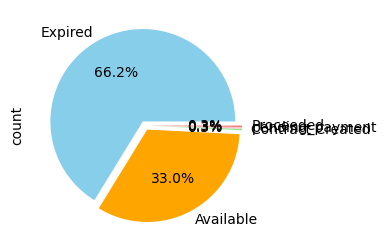

In [233]:
# when Decline Reason is not specified, we represent the distribution of 'Status' 
colors = ['skyblue', 'orange', 'lightgreen', 'pink', 'lightcoral']

plt.figure(figsize=(3,3))
quotes_not_specified["Status"].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    explode=(0.05, 0.05, 0.05, 0.05, 0.05),
    colors=colors
)
plt.show()


* let's try to understand what's in Expired

In [234]:

# Filter 
quotes_decline_not_specified_expired = quotes[(quotes['Decline Reason New'] == 'not specified') & (quotes['Status'] == 'Expired')]
quotes_decline_not_specified_expired.head()

,Request UUID,Quote Unit Price,Status,Decline Reason,Samples Available,Documents Provided,Decline Reason New
11,50ef47ee-1cb8-44bf-9444-2c057fdc72ca,£2.86,Expired,NaN,No,Yes,not specified
48,52fc0262-ed22-40f7-b983-a8df4c6d7a0d,£77.00,Expired,NaN,Yes,Yes,not specified
60,b9701840-f486-4e5a-989e-bfaf42c0ca65,£12.25,Expired,NaN,No,Yes,not specified
62,cc66f476-9f26-426c-9216-0150c87f8c78,£20.00,Expired,NaN,Yes,No,not specified
66,1c0a5675-bc9e-4a4f-8e1f-eb1f673e0038,£2.00,Expired,NaN,Yes,Yes,not specified


In [235]:
quotes_decline_not_specified_expired.shape

(249, 7)

In [236]:
quotes_decline_not_specified_expired["Decline Reason"].isna().sum()

249

* when in the same time :
  * Status = Expired 
  * Decline Reason New = not specified
 decline reason is NaN in 100% of cases

### 2-2-2 Column "Ordered"

In [237]:
quotes["Status"].value_counts(normalize= True).round(2) * 100

Status
Expired             59.0
Available           25.0
Ordered             12.0
Declined             3.0
Contract Created     0.0
pending_payment      0.0
Proceeded            0.0
Name: proportion, dtype: float64

* 11.79% of quotes are Ordered

### command carried out , so variable status = "Ordered". 

In [238]:
# Filter the dataframe based on the value of "status" == Ordered

quotes_ordered = quotes[quotes['Status'] == 'Ordered']
print(quotes_ordered.shape)
quotes_ordered.head()

(58, 7)


,Request UUID,Quote Unit Price,Status,Decline Reason,Samples Available,Documents Provided,Decline Reason New
28,fca03c4f-3f16-40d0-b87c-16d9343e4a52,£4.65,Ordered,NaN,Yes,Yes,no decline
30,d596642b-c417-49e6-aa3b-ec6185fb2b9f,£0.58,Ordered,NaN,No,Yes,no decline
79,9cf11f62-7b1e-4a7f-9c40-c12ad721a72b,£1.66,Ordered,NaN,No,Yes,no decline
80,3c583881-a99d-42ca-a81b-648bc6884976,£1.58,Ordered,NaN,No,Yes,no decline
84,2473d2dc-0a5c-4a61-a73d-3050faf0f7a0,£3.77,Ordered,NaN,Yes,No,no decline


/var/folders/kz/qqr4yxrj5nn1nh6fbydp02yc0000gn/T/ipykernel_68733/654951754.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quotes_ordered["group_samples_provided"] = "No"
/var/folders/kz/qqr4yxrj5nn1nh6fbydp02yc0000gn/T/ipykernel_68733/654951754.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quotes_ordered["group_samples_provided"] = np.where(


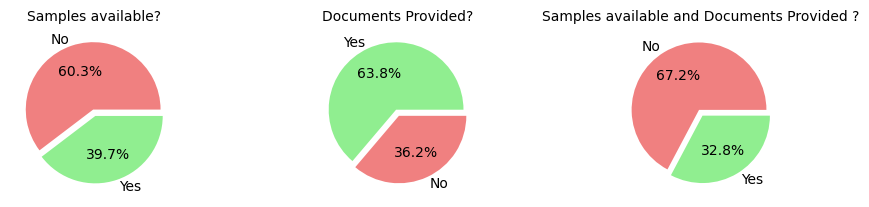

In [239]:
# graphical representation of the variables 'Samples Available' and 'Documents Provided' separated and grouped

plt.figure(figsize=(10,10))
fontsize = 10

# Samples available
plt.subplot(131)
plt.title('Samples available?', fontsize=fontsize)

quotes_ordered["Samples Available"].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    explode=(0.05, 0.05),
    colors=['lightcoral', 'lightgreen'], 
)
plt.ylabel('')

# Documents Provided
plt.subplot(132)
plt.title('Documents Provided?', fontsize=fontsize)

quotes_ordered["Documents Provided"].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    explode=(0.05, 0.05),
    colors=['lightgreen', 'lightcoral'], 
)
plt.ylabel('')

# Samples available and Documents Provided in the same time
## Create a new column "group_samples_provided" by default = "no" 
quotes_ordered["group_samples_provided"] = "No"

## Condition samples available and Documents Provided in the same time = yes 
## "group_samples_provided" = yes
quotes_ordered["group_samples_provided"] = np.where(
    (quotes_ordered['Samples Available'] == 'Yes') & 
    (quotes_ordered['Documents Provided'] == 'Yes'),
    "Yes",
    quotes_ordered["group_samples_provided"]
)


plt.subplot(133)
plt.title('Samples available and Documents Provided ?', fontsize=fontsize)

quotes_ordered['group_samples_provided'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    explode=(0.05, 0.05),
    colors=['lightcoral', 'lightgreen'], 
)
plt.ylabel('')

plt.subplots_adjust(wspace=0.8)
plt.show()


* 39,7 % of ordered had "samples available"
* 63,8 % of ordered had "Documents Provided"
* 32,8 % of ordered had "Documents Provided" and "samples available"

# 3 - Requests :

## 3 - 1 - Cleaning :

In [240]:
requests.head()

,Request UUID,Current Unit Price,Target Unit Price,Supply Priority
0,820412eb-8d4d-4d6c-a5e3-cfc977cd6d48,£3.50,£3.00,Price
1,08f1a913-1318-4656-9418-ce580a9871cb,£0.01,£0.01,Price
2,8cd6fd33-a1bc-43cb-9c63-df7d629d5362,£0.01,£0.01,Price
3,9388fbf6-410b-4f85-999a-1ff4d4cb733b,£0.01,£0.01,Price
4,37d05dfe-7f47-4eed-8e78-9f74c303bcad,£0.01,£0.01,Price


In [241]:
# delete £
requests['Current Unit Price'] = requests['Current Unit Price'].replace('£', '', regex=True)
requests['Target Unit Price'] = requests['Target Unit Price'].replace('£', '', regex=True)

In [244]:
# delete rows with values = 0,01
requests = requests.loc[(requests['Current Unit Price'] != '0.01') & (requests['Target Unit Price'] != '0.01')]


In [269]:
# convert 'columns_to_convert' in int

columns_to_convert = ['Current Unit Price', 'Target Unit Price']

requests[columns_to_convert] = requests[columns_to_convert].replace({',': ''}, regex=True).astype(float).round(2)
requests[columns_to_convert] = requests[columns_to_convert].astype(float).round(2)

requests.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354 entries, 0 to 388
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Request UUID        354 non-null    object 
 1   Current Unit Price  354 non-null    float64
 2   Target Unit Price   354 non-null    float64
 3   Supply Priority     258 non-null    object 
dtypes: float64(2), object(2)
memory usage: 13.8+ KB


In [275]:

print("requests :", requests.shape)
print("quotes   :", quotes.shape)

result = (((quotes.shape[0] - requests.shape[0]) / requests.shape[0] ) * 100 )
print("There are ,", round(result), "% more Quotes than Requests")

requests : (354, 4)
quotes   : (492, 7)
There are , 39 % more Quotes than Requests


## 3 - 2 - Analysis

### Merge quotes_order with Request



* Before start merge, show file : Table Requests-QUotes

* understanding why a quote is accepted based on the
 * Target Unit Price
 * Current Unit Price
 * Quote Unit Price

---



In [ ]:
# inner merge

print(quotes_ordered.shape)
quotes_ordered_request = quotes_ordered.merge(right= request, on= 'Request UUID', how = 'inner')
print(quotes_order_request.shape)
quotes_ordered_request.head()

In [ ]:
quotes_ordered_request.head()

In [ ]:
# convert columns 'price' to integer

columns_to_convert = ['Quote Unit Price', 'Current Unit Price', 'Target Unit Price']
quotes_ordered_request[columns_to_convert] = quotes_ordered_request[columns_to_convert].astype(float).round(2)


In [ ]:
quotes_ordered_request.info()

In [ ]:
# delete rows with values = 0,01

quotes_ordered_request = quotes_ordered_request.loc[(quotes_ordered_request['Current Unit Price'] != 0.01) & (quotes_ordered_request['Target Unit Price'] != 0.01)]


* Addition of a column **'Price Difference (%)'** that calculates the percentage between the value requested by the buyer **Target Unit Price** and the price provided on the quote by the buyer **Quote Unit Price.**

In [ ]:
quotes_ordered_request['Price Difference (%)'] = ((quotes_ordered_request['Quote Unit Price'] - quotes_ordered_request['Target Unit Price']) / quotes_ordered_request['Target Unit Price']) * 100


<ipython-input-149-6c4dddc26466>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quotes_ordered_request['Price Difference (%)'] = ((quotes_ordered_request['Quote Unit Price'] - quotes_ordered_request['Target Unit Price']) / quotes_ordered_request['Target Unit Price']) * 100


In [ ]:
quotes_ordered_request.head()

* We could add 2 more columns for:
 * Price negotiated upwards.
 * Price negotiated downwards.

In [ ]:
requests.shape

(354, 4)

In [ ]:
# convert columns 'price' to integer

requests[columns_to_convert] = requests[columns_to_convert].replace({',': ''}, regex=True).astype(float).round(2)

columns_to_convert = ['Current Unit Price', 'Target Unit Price']
requests[columns_to_convert] = requests[columns_to_convert].astype(float).round(2)


In [ ]:
requests.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 388
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Request UUID        354 non-null    object 
 1   Current Unit Price  354 non-null    float64
 2   Target Unit Price   354 non-null    float64
 3   Supply Priority     258 non-null    object 
dtypes: float64(2), object(2)
memory usage: 13.8+ KB




---



* 29 dec : stop coding at 8:00. (2h)


---

